### Question 1: Use the IRIS dataset and create a decision tree and check the accuracy label.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print("Features are:",iris.feature_names)

Features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Targets are:",iris.target_names)

Targets are: ['setosa' 'versicolor' 'virginica']


In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target,test_size=0.30,random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

### Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [28]:
ypred=classifier.predict(xtest)

In [29]:
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

### Calculating accuracy score, classification report, confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_dec=confusion_matrix(ytest,ypred)
print("confusion matrix:\n",cm_dec)

confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


<AxesSubplot:>

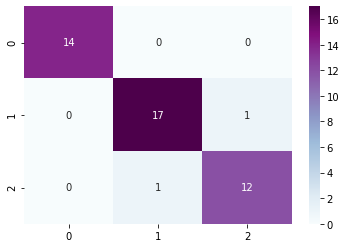

In [31]:
sns.heatmap(cm_dec,annot=True,cmap='BuPu')

In [32]:
report_dec=classification_report(ytest,ypred)
print("classification report of iris data using decision tree classifier is:\n",report_dec)

classification report of iris data using decision tree classifier is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [33]:
accuracy=accuracy_score(ytest,ypred)*100
print("Accuracy of iris data using decision tree classifier is:",accuracy)

Accuracy of iris data using decision tree classifier is: 95.55555555555556


### By using Decision tree classifier for Iris Data, Accuracy is 95.55%

### Decision tree representation

[Text(133.92000000000002, 195.696, 'X[3] <= -0.501\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 0.59\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 0.709\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 0.297\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 0.625\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 0.148\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsam

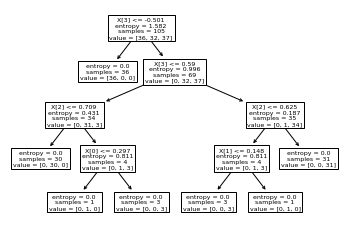

In [34]:
from sklearn import tree
tree.plot_tree(classifier)

### Text Representation

In [35]:
text_repr=tree.export_text(classifier)
print("Text Representation is:\n",text_repr)

Text Representation is:
 |--- feature_3 <= -0.50
|   |--- class: 0
|--- feature_3 >  -0.50
|   |--- feature_3 <= 0.59
|   |   |--- feature_2 <= 0.71
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- feature_0 <= 0.30
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.30
|   |   |   |   |--- class: 2
|   |--- feature_3 >  0.59
|   |   |--- feature_2 <= 0.62
|   |   |   |--- feature_1 <= 0.15
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.15
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.62
|   |   |   |--- class: 2

